<a href="https://colab.research.google.com/github/rodrigosantis1/intropython/blob/master/Cap%209%20-%20Deep%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image

%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


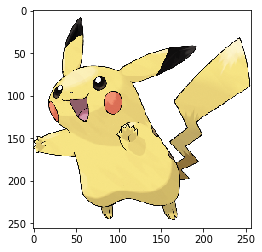

In [40]:
from google.colab import drive
drive.mount('/content/drive')

# Read Images 
img = Image.open('drive/My Drive/Colab Notebooks/data/pokemon/electric/25.png') 
  
# Output Images 
plt.imshow(img)
plt.show()

In [3]:
df = pd.read_csv('drive/My Drive/Colab Notebooks/data/pokemon.csv')
df.loc[df.Type_1 == 'Flying', 'Type_1'] = 'Normal' # Change flying to normal, only few samples are flying type
df.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


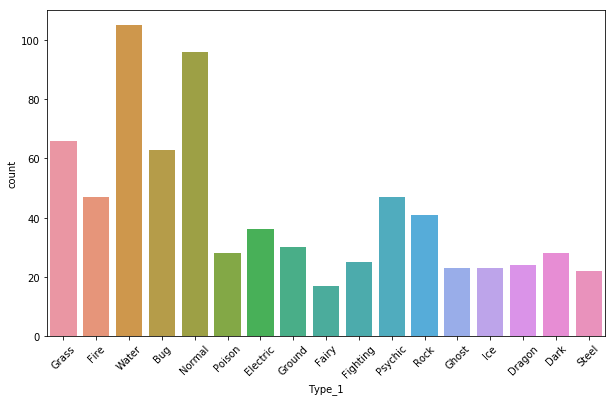

In [4]:
plt.figure(figsize=(10,6))
ax = sns.countplot('Type_1',data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

In [18]:
from keras.preprocessing.image import ImageDataGenerator

train_data_dir='drive/My Drive/Colab Notebooks/data/pokemon/'
img_height=img_width=32
batch_size=32
nb_epochs=32

train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 648 images belonging to 17 classes.
Found 154 images belonging to 17 classes.


In [0]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential()
model.add(Conv2D(img_height, (3, 3), input_shape=(img_height,img_width,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Adding a second convolutional layer
model.add(Conv2D(img_height, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Step 3 - Flattening
model.add(Flatten())
# Step 4 - Full connection
model.add(Dense(units=img_height*4, activation = 'relu'))
model.add(Dense(units=img_height, activation = 'tanh'))
model.add(Dense(units=17, activation = 'sigmoid'))
# Compiling the CNN
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [20]:
from keras.callbacks import EarlyStopping

model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = nb_epochs,
    callbacks = [EarlyStopping(monitor='val_loss', patience=5)] 
)

Epoch 1/32
20/20 [==============================] - 3s 127ms/step - loss: 2.7634 - acc: 0.1375 - val_loss: 2.6898 - val_acc: 0.1641
Epoch 2/32
20/20 [==============================] - 2s 118ms/step - loss: 2.6826 - acc: 0.1514 - val_loss: 2.6346 - val_acc: 0.1557
Epoch 3/32
20/20 [==============================] - 2s 115ms/step - loss: 2.6855 - acc: 0.1422 - val_loss: 2.6863 - val_acc: 0.1393
Epoch 4/32
20/20 [==============================] - 2s 103ms/step - loss: 2.6389 - acc: 0.1443 - val_loss: 2.6125 - val_acc: 0.1721
Epoch 5/32
20/20 [==============================] - 2s 105ms/step - loss: 2.5972 - acc: 0.1668 - val_loss: 2.5976 - val_acc: 0.1393
Epoch 6/32
20/20 [==============================] - 2s 114ms/step - loss: 2.5797 - acc: 0.1735 - val_loss: 2.5833 - val_acc: 0.1875
Epoch 7/32
20/20 [==============================] - 3s 128ms/step - loss: 2.6006 - acc: 0.1688 - val_loss: 2.5857 - val_acc: 0.1721
Epoch 8/32
20/20 [==============================] - 2s 106ms/step - loss: 2.

## Resultados

Vamos carregar algumas imagens e avaliar as classificações feitas pelo nosso modelo de aprendizado profundo.

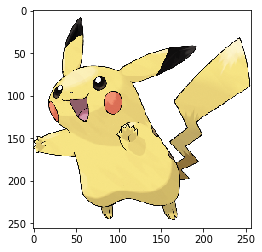

          Probability
normal       0.768436
bug          0.723917
fire         0.716387
electric     0.648969
water        0.303719


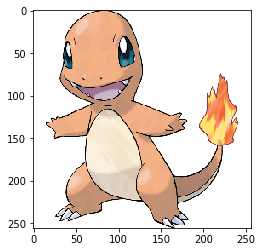

         Probability
fire        0.756489
water       0.648112
bug         0.600372
normal      0.394141
psychic     0.387613


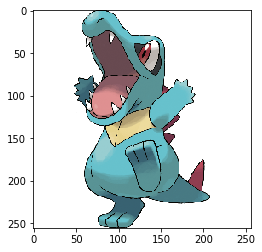

         Probability
water       0.899803
grass       0.501704
ice         0.471140
psychic     0.279187
steel       0.272264


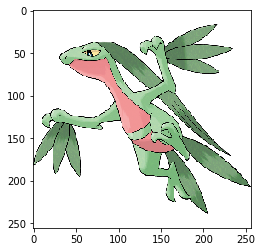

         Probability
grass       0.789056
water       0.787786
rock        0.428031
normal      0.405371
psychic     0.321383


In [89]:
classes = train_generator.class_indices.keys()

def prepare_image(img,width,height):
  img = np.array(img.resize((width,height),Image.ANTIALIAS))
  return np.expand_dims(img[:,:,:3], axis=0)

def print_probability(img_array):
  prob = model.predict(img_array)[0]
  index = classes
  res = pd.DataFrame(prob,index=index,columns=['Probability'])
  print(res.sort_values('Probability',ascending=False).head())

  
def who_is_this_pokemon(imgpath):
  img = Image.open(imgpath) 
  plt.imshow(img); plt.show()
  img_array = prepare_image(img, img_width, img_height)
  print_probability(img_array)
  
who_is_this_pokemon('drive/My Drive/Colab Notebooks/data/pokemon/electric/25.png') # Pikachu
who_is_this_pokemon('drive/My Drive/Colab Notebooks/data/pokemon/fire/4.png') # Charmander
who_is_this_pokemon('drive/My Drive/Colab Notebooks/data/pokemon/water/158.png') # Totodile
who_is_this_pokemon('drive/My Drive/Colab Notebooks/data/pokemon/grass/253.png') # Grovyle